### 1. US Recovered Cases between 10/26-11/9/2020

              date country       type  cases
209606  2020-10-26      US  recovered  37577
209607  2020-10-27      US  recovered  27211
209608  2020-10-28      US  recovered  30474
209609  2020-10-29      US  recovered  36196
209610  2020-10-30      US  recovered  24116
209611  2020-10-31      US  recovered  34026
209612  2020-11-01      US  recovered  18101
209613  2020-11-02      US  recovered  44402
209614  2020-11-03      US  recovered  30149
209615  2020-11-04      US  recovered  38397
209616  2020-11-05      US  recovered  38224
209617  2020-11-06      US  recovered  29040
209618  2020-11-07      US  recovered  40674
209619  2020-11-08      US  recovered  30026
209620  2020-11-09      US  recovered  47354


[Text(0, 0.5, 'Number of Recovered Cases'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'The Number of Covid-19 Confirmed Cases in the US, October 26-November 9 2020')]

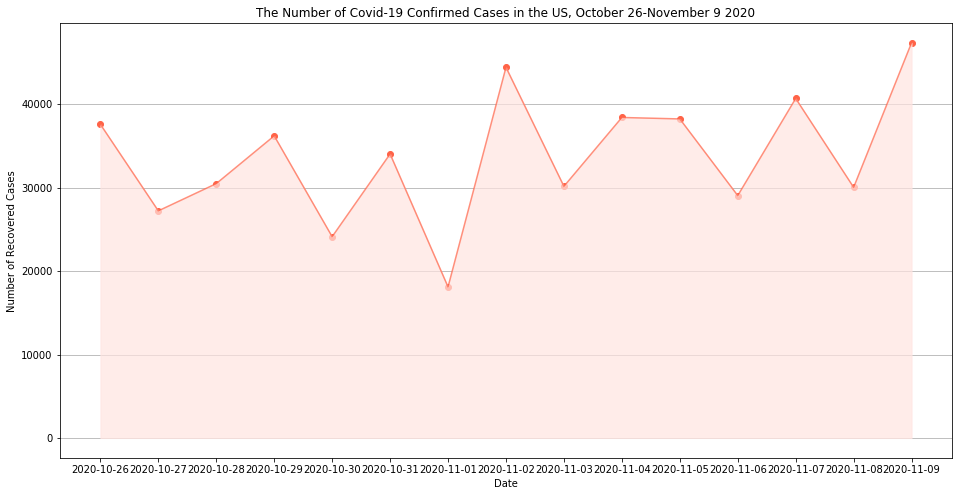

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

url = 'https://raw.githubusercontent.com/RamiKrispin/coronavirus/master/csv/coronavirus.csv'
df = pd.read_csv(url, header = 0,
                usecols = ['date', 'country', 'type', 'cases']) 
df_us = df[(df.country=='US') & (df.type=='recovered')]
df_us.date    
#df_us['date'] = pd.to_datetime(df_us.date), condenses data in visualization instead since we're only choosing 10/26-11/9, so no need

#data from 10/26 to 11/09
df_octnov = df_us[(df_us['date'] >= '2020-10-26') & (df_us['date'] <= '2020-11-09')]
print(df_octnov)

#scatterplot/line
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(df_octnov.date, df_octnov.cases, color='tomato', alpha=1)
ax.plot(df_octnov.date, df_octnov.cases, color='tomato', alpha=0.7) 

#aesthetics
ax.fill_between(df_octnov.date, df_octnov.cases,                
                color='mistyrose', alpha=0.7) 
ax.grid(axis='y')                                     
ax.set_axisbelow(True)   

#labels
ax.set(xlabel='Date', ylabel='Number of Recovered Cases', title = 'The Number of Covid-19 Confirmed Cases in the US, October 26-November 9 2020')
      

### 2. Brazil Jan-Nov Confirmed Cases

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[Text(0, 0.5, 'Number of Confirmed Cases'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Number of Covid-19 Confirmed Cases in Brazil, Jan-Nov 2020')]

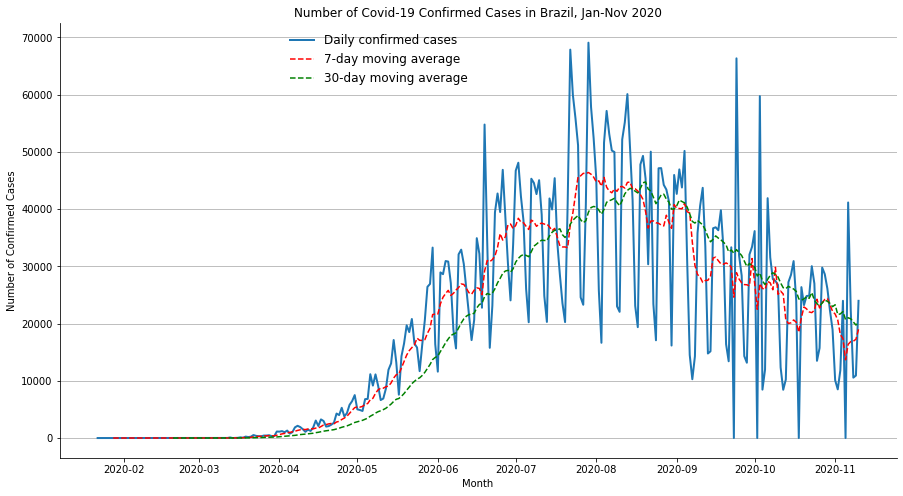

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

url = 'https://raw.githubusercontent.com/RamiKrispin/coronavirus/master/csv/coronavirus.csv'
df = pd.read_csv(url, header = 0,
                usecols = ['date', 'country', 'type', 'cases']) 

#unclutters x-axis
df.date
df['date'] = pd.to_datetime(df.date)
#brazil has 0 confirmed cases until 2-26, is this why the time series skips 2020-01?

#filter data
df_bra = df[(df.country=='Brazil') & (df.type=='confirmed')]

#7 and 30-day moving averages 
df_bra['mov_avg'] = df_bra.cases.rolling(7).mean()
df_bra['mov_avg_2'] = df_bra.cases.rolling(30).mean()

#linegraph
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(df_bra.date, df_bra.cases, linewidth=2,
        label='Daily confirmed cases')                                         

#add moving averages 
ax.plot(df_bra.date, df_bra.mov_avg,                                             
        'r--',                                                                 
        label='7-day moving average')     
ax.plot(df_bra.date, df_bra.mov_avg_2,                                             
        'g--',                                                                 
        label='30-day moving average')   


## aesthetics
ax.spines['top'].set_visible(False)                                            
ax.spines['right'].set_visible(False)                                          
ax.grid(axis='y')                                                            
ax.set_axisbelow(True)                                                        

#labels
ax.legend(frameon=False, fontsize=12, bbox_to_anchor=(0.5, 1))              
ax.set(xlabel='Month', ylabel='Number of Confirmed Cases', title = 'Number of Covid-19 Confirmed Cases in Brazil, Jan-Nov 2020')